In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse
import sklearn.linear_model as lm 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print("Percentage of Null values in each column: ")
display((df.isnull().sum()/len(df))*100)

In [ ]:
df.describe()

In [ ]:
# check for skewness
col_names = df.columns

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=12)
    ax[i].set_ylabel('Count', fontsize=12)

plt.subplots_adjust(bottom = 0.01, top = 2, hspace = 0.5 )
plt.show()

In [ ]:
df.corr()

In [ ]:
labs = df.columns
axarr = scatter_matrix(df[labs],figsize=(20,20),hist_kwds={'bins':30,'color':'black'}) # create scatter plots and histograms

# the plots in the upper-right corner are repetitive, so replace this with correlations for quicker analysis
for i,axlist in enumerate(axarr):
    for j,ax in enumerate(axlist):
        if i<j:
            ax.cla() # clears an Axes object
            ax.text(x=0.8*ax.get_xlim()[0]+0.2*ax.get_xlim()[1],y=0.6*ax.get_ylim()[0]+0.4*ax.get_ylim()[1],
                    s=np.round(np.corrcoef(df[labs[i]],df[labs[j]])[0,1],2),fontsize=20) # adds text to an Axes object


In [ ]:
X = df.iloc[:, :-1 ]
y = df.iloc[:,-1:]

In [ ]:
standardized_X = preprocessing.scale(X)

In [ ]:
def rmse(actual_y, predicted_y):
    return np.sqrt((1/len(actual_y)*sum((actual_y - predicted_y)**2)))

## OLS  

##### No Train Test Split

In [ ]:
from sklearn import linear_model as lm
X_train, X_test , y_train, y_test = train_test_split(standardized_X, y, test_size=0.1, random_state=1)
ols_model = lm.LinearRegression()

In [ ]:
ols_model.fit(X_train, y_train)
predicted_y = ols_model.predict(X_test)

In [ ]:
OLS_coefficients_array = np.append(ols_model.coef_, ols_model.intercept_)
indices = np.append(X.columns,"intercept")
OLS_coefficients = pd.DataFrame(OLS_coefficients_array,index = indices).rename(columns = {0: "coefficients"})
OLS_coefficients

In [ ]:
np.mean(cross_val_score(ols_model, standardized_X, y, scoring='neg_mean_squared_error', cv=5))


MSE = 0.4366293880320982

## RIDGE

In [ ]:
ridge = Ridge()

In [ ]:
alphas = np.arange(0.1, 100, 0.05)

In [ ]:
parameters = {'alpha': alphas}

In [ ]:
r_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv = 5)

In [ ]:
r_regressor.fit(standardized_X, y)

In [ ]:
r_regressor.best_score_

In [ ]:
r_regressor.best_index_

In [ ]:
alphas[r_regressor.best_index_]

In [ ]:
scores_mean = r_regressor.cv_results_['mean_test_score']

In [ ]:
min(-1*scores_mean)

In [ ]:
 _, ax = plt.subplots(1,1)
ax.plot(alphas, -1*scores_mean)
plt.axvline(x=alphas[r_regressor.best_index_], color='red', linestyle='dashed')

MSE = 0.43533034290183703

## Lasso

In [ ]:
lasso = Lasso()

In [ ]:
alphas = np.arange(0.0001, 0.1, 0.00005)

In [ ]:
parameters = {'alpha': alphas}

In [ ]:
l_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

In [ ]:
l_regressor.fit(standardized_X, y)

In [ ]:
l_regressor.best_params_

In [ ]:
l_regressor.best_score_

In [ ]:
l_regressor.best_index_

In [ ]:
alphas[l_regressor.best_index_]

In [ ]:
l_scores_mean = l_regressor.cv_results_['mean_test_score']

In [ ]:
min(-l_scores_mean)

In [ ]:
 _, ax = plt.subplots(1,1)
ax.plot(alphas, -1*l_scores_mean)
plt.axvline(x=alphas[92], color='red', linestyle='dashed')

MSE = 0.4356902226391317

## Elastic Net


In [ ]:
en = ElasticNet()
aph = np.arange(.001, 0.1, .001)
parameters = {'alpha': aph}
en_regressor = GridSearchCV(en, parameters, scoring='neg_mean_squared_error', cv = 5)
en_regressor.fit(standardized_X, y)
en_regressor.best_params_

In [ ]:
en_regressor.best_score_

In [ ]:
en_regressor.best_index_

In [ ]:
aph[en_regressor.best_index_]

In [ ]:
en_scores_mean = en_regressor.cv_results_['mean_test_score']

In [ ]:
min(-en_scores_mean)

In [ ]:
 _, ax = plt.subplots(1,1)
ax.plot(aph, -1*en_scores_mean)
plt.axvline(x=aph[en_regressor.best_index_], color='red', linestyle='dashed')

In [ ]:
en_model = ElasticNet(alpha= aph[en_regressor.best_index_])

In [ ]:
en_model.fit(standardized_X, y)

In [ ]:
en_coefficients_array = np.append(en_model.coef_, en_model.intercept_)
indices = np.append(X.columns,"intercept")
en_coefficients = pd.DataFrame(en_coefficients_array,index = indices).rename(columns = {0: "coefficients"})
en_coefficients 

MSE = 0.4357356717146164

## SVM

In [4]:
df_svm = pd.read_csv('wholesale-customers.csv', sep=',')
df_svm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
#the sales channel (Hotel/Restaurant/Cafe = 1 vs. Retail = 2) 
#the region (Lisbon = 1, Oporto = 2, or Other = 3) of the retailer

### Linear SVM

In [39]:
X_svm = df_svm.drop(columns = ["Channel"])
#X_svm = preprocessing.scale(X_svm)
y_svm = df_svm["Channel"]

In [51]:
from sklearn import svm, grid_search
#def svc_param_selection(X, y, nfolds):
    #X_train, X_test, y_train, y_test =train_test_split(features, target , test_size=0.3)
Cs = np.logspace(-10, 0, 10)
#tols = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs }
grid_search = GridSearchCV(svm.LinearSVC(), param_grid, scoring = "neg_mean_squared_error",cv=5, n_jobs=-1)
grid_search.fit(X_svm, y_svm)
grid_search.best_params_


{'C': 1.6681005372000592e-08}

In [52]:
grid_search.best_score_

-0.1409090909090909

In [53]:
grid_search.best_index_

2

In [54]:
Cs[2]

1.6681005372000592e-08

In [55]:
grid_search_scores = grid_search.cv_results_['mean_test_score']
grid_search_scores

array([-0.20909091, -0.15454545, -0.14090909, -0.14318182, -0.18409091,
       -0.3       , -0.24090909, -0.30681818, -0.30227273, -0.30681818])

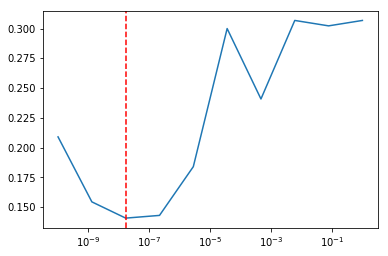

In [56]:
 _, ax = plt.subplots(1,1)
ax.semilogx(Cs, -1*grid_search_scores)
plt.axvline(x=Cs[grid_search.best_index_],color='red', linestyle='dashed')


In [57]:
Cs = np.logspace(-10, 0, 10)
#tols = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs }
grid_search = GridSearchCV(svm.LinearSVC(), param_grid, scoring = "accuracy",cv=5, n_jobs=-1)
grid_search.fit(X_svm, y_svm)
grid_search.best_params_
grid_search_scores = grid_search.cv_results_['mean_test_score']
grid_search_scores

array([0.79090909, 0.84545455, 0.85909091, 0.85681818, 0.81818182,
       0.81590909, 0.70227273, 0.73863636, 0.77272727, 0.73409091])

In [58]:
grid_search.best_index_

2

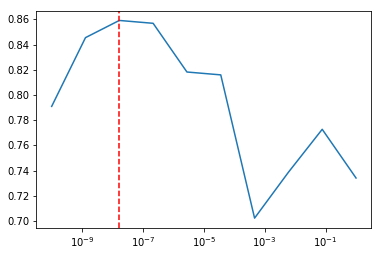

In [59]:
 _, ax = plt.subplots(1,1)
ax.semilogx(Cs, grid_search_scores)
plt.axvline(x=Cs[grid_search.best_index_],color='red', linestyle='dashed')

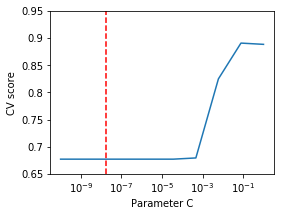

In [60]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

X = X_svm
y = y_svm
 
X = preprocessing.scale(X)

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
#scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, cv=5, n_jobs=-1)
    scores.append(np.mean(this_scores))
    #scores_std.append(np.std(this_scores))

# Do the plotting
import matplotlib.pyplot as plt
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
# plt.ylim(0, 1.1)
plt.axvline(x=Cs[grid_search.best_index_],color='red', linestyle='dashed')

In [69]:
tuned_parameters = {'C': np.logspace(-10, 0, 10), "degree": [2,3,4,5,6] }
grid_search = GridSearchCV(svm.SVC(kernel = "poly"), tuned_parameters, scoring = "accuracy",cv=5, n_jobs=-1)
X_svm = preprocessing.scale(X_svm)
grid_search.fit(X_svm, y_svm)
grid_search.best_params_       

{'C': 1.0, 'degree': 3}

In [70]:
grid_search.best_score_

0.7795454545454545

In [76]:
grid_search_scores = grid_search.cv_results_['mean_test_score']
grid_search_scores

array([0.67727273, 0.67727273, 0.67727273, 0.67727273, 0.67727273,
       0.67727273, 0.67727273, 0.67727273, 0.67727273, 0.67727273,
       0.67727273, 0.67727273, 0.67727273, 0.67727273, 0.67727273,
       0.67727273, 0.67727273, 0.67727273, 0.67727273, 0.68181818,
       0.67727273, 0.67727273, 0.67727273, 0.68409091, 0.68636364,
       0.67727273, 0.67727273, 0.68409091, 0.68636364, 0.68863636,
       0.67727273, 0.68636364, 0.68636364, 0.69318182, 0.69545455,
       0.69090909, 0.69772727, 0.69772727, 0.70227273, 0.70681818,
       0.73181818, 0.75      , 0.73863636, 0.73181818, 0.73409091,
       0.66363636, 0.77954545, 0.75454545, 0.74545455, 0.74090909])